## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# 設定超參數
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.7, 0.5, 0.3, 0.1]

In [7]:
results = {}
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMEMTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov= False, momentum=mo)
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMEMTUM = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.3133 - acc: 0.9000 - val_loss: 0.3021 - val_acc: 0.9000
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2950 - acc: 0.9001 - val_loss: 0.2892 - val_acc: 0.9005
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2847 - acc: 0.9008 - val_loss: 0.2813 - val_acc: 0.9016
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2782 - acc: 0.9017 - val_loss: 0.2763 - val_acc: 0.9021
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2735 - acc: 0.9024 - val_loss: 0.2726 - val_acc: 0.9023
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2699 - acc: 0.9030 - val_loss: 0.2688 - val_acc: 0.9030
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2668 - acc: 0.9036 - val_loss: 0.2657 - val_acc: 0.9039
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 2s 40us/step - loss: 0.3015 - acc: 0.9000 - val_loss: 0.2957 - val_acc: 0.9000
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2910 - acc: 0.9002 - val_loss: 0.2872 - val_acc: 0.9007
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2841 - acc: 0.9008 - val_loss: 0.2817 - val_acc: 0.9011
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2793 - acc: 0.9014 - val_loss: 0.2777 - val_acc: 0.9017
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2756 - acc: 0.9018 - val_loss: 0.2744 - val_acc: 0.9020
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2726 - acc: 0.9022 - val_loss: 0.2719 - val_acc: 0.9023
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2702 - acc: 0.9027 - val_loss: 0.2696 - val_acc: 0.9029
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 40us/step - loss: 0.2972 - acc: 0.9001 - val_loss: 0.2938 - val_acc: 0.9002
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2912 - acc: 0.9004 - val_loss: 0.2885 - val_acc: 0.9009
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2865 - acc: 0.9006 - val_loss: 0.2844 - val_acc: 0.9012
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2829 - acc: 0.9009 - val_loss: 0.2813 - val_acc: 0.9015
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2800 - acc: 0.9013 - val_loss: 0.2790 - val_acc: 0.9017
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2775 - acc: 0.9016 - val_loss: 0.2764 - val_acc: 0.9021
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2752 - acc: 0.9019 - val_loss: 0.2743 - val_acc: 0.9022
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 40us/step - loss: 0.2953 - acc: 0.9000 - val_loss: 0.2930 - val_acc: 0.9001
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2907 - acc: 0.9002 - val_loss: 0.2889 - val_acc: 0.9004
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2870 - acc: 0.9005 - val_loss: 0.2855 - val_acc: 0.9008
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2839 - acc: 0.9007 - val_loss: 0.2828 - val_acc: 0.9011
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2813 - acc: 0.9009 - val_loss: 0.2805 - val_acc: 0.9013
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2791 - acc: 0.9013 - val_loss: 0.2784 - val_acc: 0.9015
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.2772 - acc: 0.9016 - val_loss: 0.2764 - val_acc: 0.9018
Epoch 11/50
50000/50000 [==========================

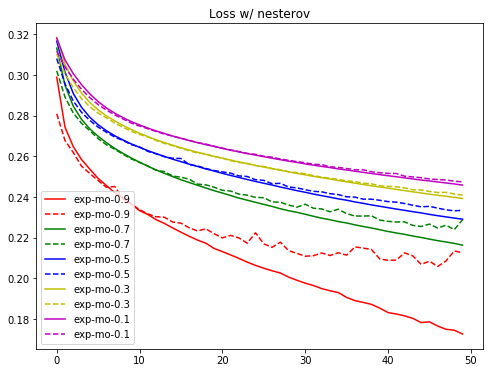

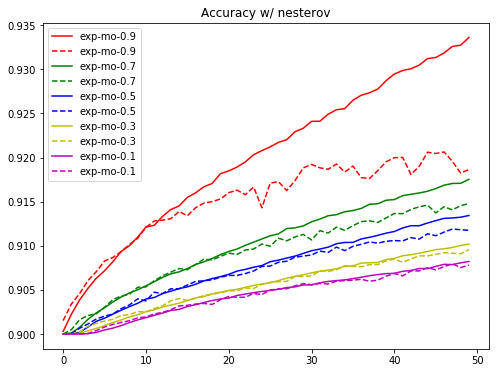

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss w/ nesterov")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy w/ nesterov")
plt.legend()
plt.show()